# Import Packages

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the saved data for modeling
df_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CIS 5450/Project/df_for_model.csv")

# Prepare data

Extract numeric value features and drop NaN values.

In [ ]:
# Peek
df_model.head(3)

,product_name,ingredients_text,serving_size,additives_n,additives,additives_en,nutrition_grade_fr,energy_100g,fat_100g,saturated_fat_100g,...,vitamin_c_100g,calcium_100g,iron_100g,organic_label,nutrition_score_100g,nutrition_grade,cleaned_ingredients,cleaned_ingredients_new,tokenized_ingredients,mean_embedding
0,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts ] [ wheat-flour ] [ flour ] [ sug...,NaN,b,1941.0,17.86,0.00,...,0.0,0.071,0.00129,0,0.0,4,"peanuts, wheat flour, sugar, rice flour, tapio...",peanuts wheat flour sugar rice flour tapioca s...,"[185, 23629, 1116, 11773, 15068, 6656, 7738, 1...",7392.868421
1,Granola Cranberry And Acai,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,[ whole-rolled-oats ] [ rolled-oats ] [ oats...,NaN,c,1824.0,10.91,0.91,...,0.0,0.036,0.00262,0,6.0,3,"whole rolled oats, milled cane sugar, vegetabl...",whole rolled oats milled cane sugar vegetable ...,"[2006, 3733, 184, 9971, 6159, 1174, 14671, 665...",6923.730769
2,"Peanuts, Mixed Nuts","Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,[ peanuts ] [ honey ] [ coating ] [ sucrose...,E415 - Xanthan gum,d,2389.0,42.86,7.14,...,0.0,0.071,0.00514,0,14.0,2,"peanuts, honey, coating sucrose, wheat starch,...",peanuts honey coating sucrose wheat starch hon...,"[185, 23629, 1116, 8531, 20911, 28117, 1665, 1...",7604.666667


In [ ]:
#Check data info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91466 entries, 0 to 91465
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             91466 non-null  object 
 1   ingredients_text         91466 non-null  object 
 2   serving_size             91466 non-null  object 
 3   additives_n              91466 non-null  float64
 4   additives                91461 non-null  object 
 5   additives_en             62159 non-null  object 
 6   nutrition_grade_fr       91466 non-null  object 
 7   energy_100g              91466 non-null  float64
 8   fat_100g                 91466 non-null  float64
 9   saturated_fat_100g       91466 non-null  float64
 10  trans_fat_100g           91466 non-null  float64
 11  cholesterol_100g         91466 non-null  float64
 12  carbohydrates_100g       91466 non-null  float64
 13  sugars_100g              91466 non-null  float64
 14  fiber_100g            

In [ ]:
# Create a dataframe with columns of numeric values
df_numerics = df_model.select_dtypes(include=np.number)
# Print out all numeric columns' names
numeric_cols = df_numerics.columns.values
print(numeric_cols)

['additives_n' 'energy_100g' 'fat_100g' 'saturated_fat_100g'
 'trans_fat_100g' 'cholesterol_100g' 'carbohydrates_100g' 'sugars_100g'
 'fiber_100g' 'proteins_100g' 'salt_100g' 'sodium_100g' 'vitamin_a_100g'
 'vitamin_c_100g' 'calcium_100g' 'iron_100g' 'organic_label'
 'nutrition_score_100g' 'nutrition_grade' 'mean_embedding']


In [ ]:
# Drop nulls and reset index
df_numerics = df_numerics.dropna().reset_index(drop=True)

#Logistic Regression Modeling for Classification

##Construct Features and Label

In [ ]:
# Stores features dataframe into variable called "features"
features = df_numerics.drop(columns=['organic_label'])
# Store the classification target variable into "target"
target = df_numerics['organic_label']

##Split Data into Train and Test

In [ ]:
# Assign 42 to seed
seed = 42
# Conduct 80/20 train-test split with random_state = seed
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [ ]:
# Show the non-organic vs organic number of rows
print('There are {} rows of non-organic food data'.format(np.bincount(y_train)[0])+'\nThere are {} rows of organic food data'.format(np.bincount(y_train)[1]))

There are 64007 rows of non-organic food data
There are 9161 rows of organic food data


##Balancing Training Data - Synthetic Minority Oversampling Technique (SMOTE)

There is an imbalance between the non-organic and organic data. We need to apply the SMOTE to balance the data before training.

In [ ]:
# Apply SMOTE to training data
smote = SMOTE(random_state=seed)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Compare data before and after applying SMOTE
print(f"Original dataset shape: {np.bincount(y_train)}")
print(f"Resampled dataset shape: {np.bincount(y_train_smote)}")

Original dataset shape: [64007  9161]
Resampled dataset shape: [64007 64007]


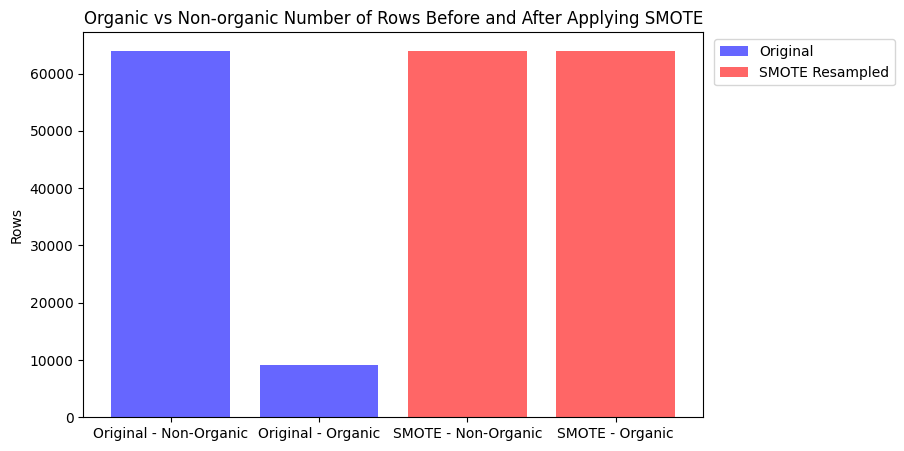

In [ ]:
# Plot the original and resampled dataset shapes
original_counts = np.bincount(y_train)
resampled_counts = np.bincount(y_train_smote)

plt.figure(figsize=(8, 5))
plt.bar(['Original - Non-Organic', 'Original - Organic'], original_counts, color='blue', alpha=0.6, label='Original')
plt.bar(['SMOTE - Non-Organic', 'SMOTE - Organic'], resampled_counts, color='red', alpha=0.6, label='SMOTE Resampled')
plt.legend(bbox_to_anchor=(1.32, 1.0), loc='upper right')
plt.title('Organic vs Non-organic Number of Rows Before and After Applying SMOTE')
plt.ylabel('Rows')
plt.show()

##PCA

The goal of Principal Component Analysis is to reduce high number of correlated features and reduce data dimensions(features).

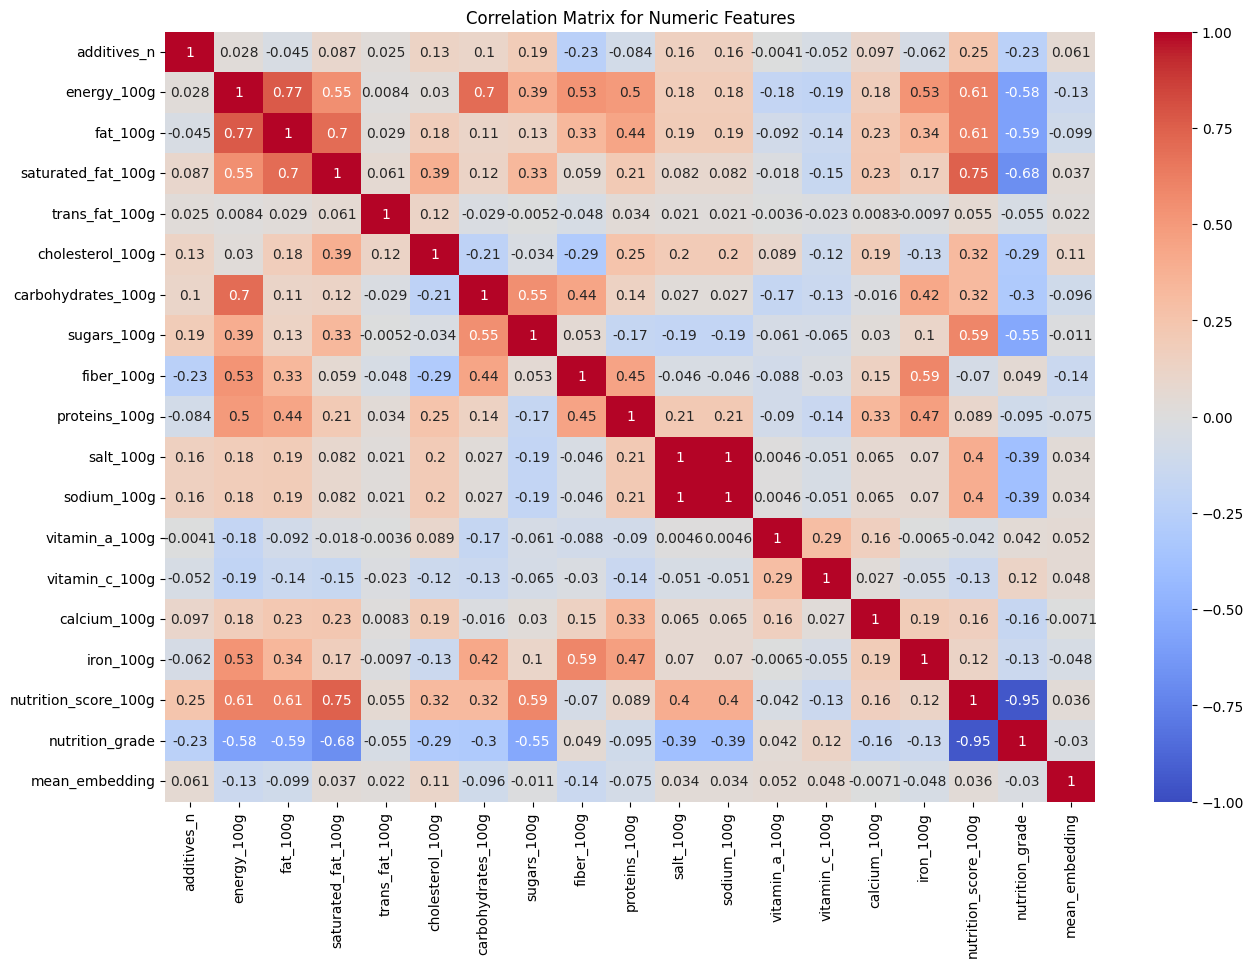

In [ ]:
# Plot correlation heatmap for training data
corr_matrix = X_train_smote.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

As we can see from the correlation matrix, the features are correlated to each other. The logistic regression is affected by correlated data. Thus, we need to apply PCA to the data.  

*Initial PCA*

In [ ]:
# Standardize features since PCA is not scale-invariant
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Instantiate and Fit PCA
pca = PCA()
pca.fit(X_train_scaled)

*Cumulative Explained Variance Ratios*

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

 *Plot the Cumulative Explained Variance Ratios*

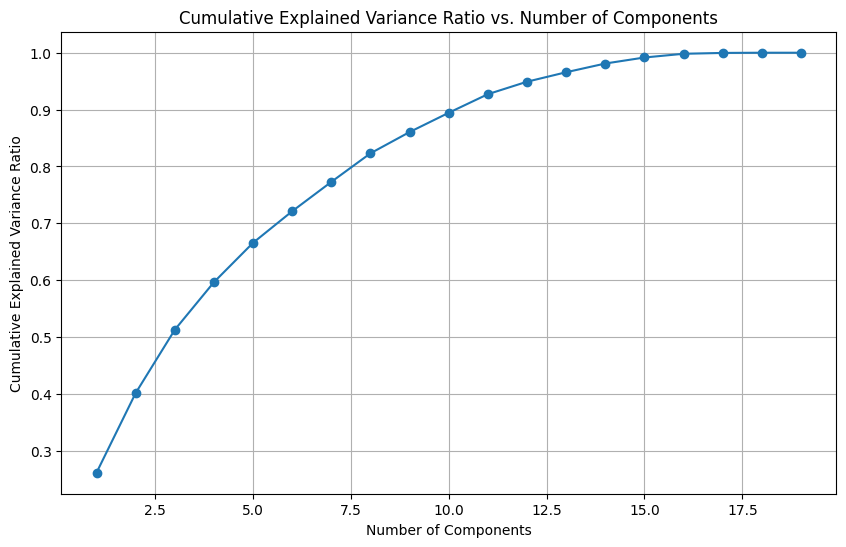

In [ ]:
# Find optimal num components to use (n) by plotting explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratios) + 1), cum_evr, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
# plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance')
plt.show()

From the plot we can see that the smallest value where the cumulative variance ratio flatten out is 15.

*Final PCA*

In [ ]:
# Refit and transform on training with parameter n (as deduced from the last step)
n = 15
pca = PCA(n_components=n)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform on Testing Set
X_test_pca = pca.transform(X_test_scaled)

##Learning Curve

Learning curve shows accuracy vs training sample size. We will use it to decide the percentage to split the training and test data while we can achieve good performance and avoid overfitting.

In [ ]:
from sklearn.model_selection import learning_curve

# Apply the learning curve with logisticRegression
clf = LogisticRegression(solver='saga', random_state=seed)
train_sizes, train_scores, test_scores = learning_curve(clf, X=X_train_pca, y=y_train_smote, train_sizes=np.linspace(0.1, 1, 20), cv=10, n_jobs=1, scoring='accuracy')

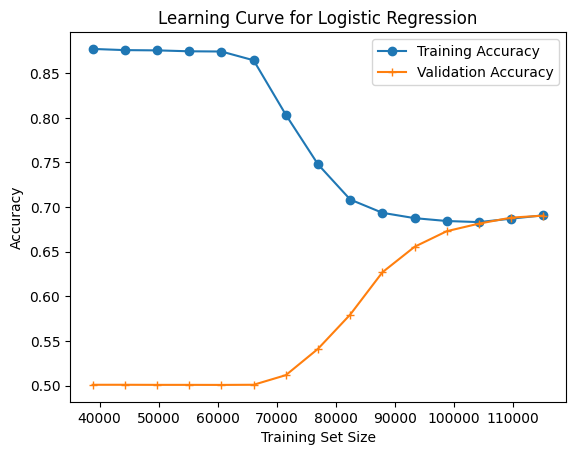

In [ ]:
# Plotting the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), marker='o', label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), marker='+', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.show()

Observation: from the plot, we can see that the training accuracy and the validation accuracy meets at around 104000 training size. This is the best training size in order to get good performance but also have a model that does not dramatically overfit.

Since the total training size now is 128000. The best training and test data splitting percentage is just around 80%.

##Logistic Regression with PCA

In [ ]:
# Initialize model with default parameters and fit it on the training set
clf_pca = LogisticRegression()
clf_pca.fit(X_train_pca, y_train_smote)

# Use the model to predict on the test set
y_pred = clf_pca.predict(X_test_pca)

# Find the accuracy
acc = clf_pca.score(X_test_pca, y_test)

In [ ]:
print(f"Accuracy: {acc}")

Accuracy: 0.6477887716612912


##Performance Measures for Logistic Regression with PCA

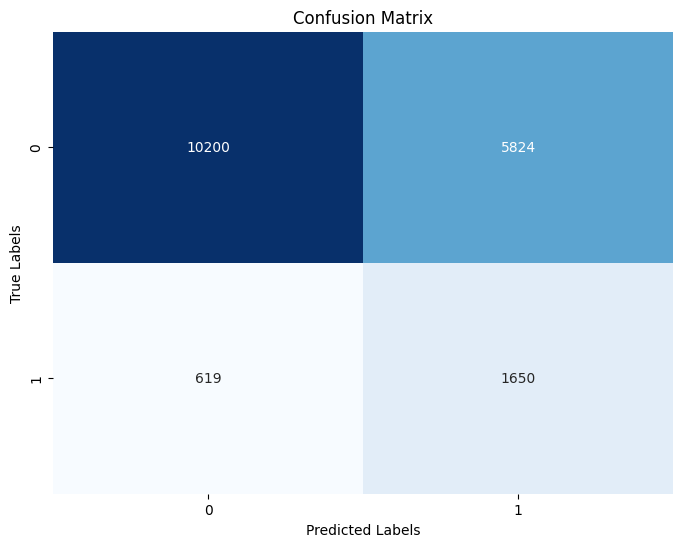

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.94      0.64      0.76     16024
           1       0.22      0.73      0.34      2269

    accuracy                           0.65     18293
   macro avg       0.58      0.68      0.55     18293
weighted avg       0.85      0.65      0.71     18293



Observation: the precision for organic prediction is relatively low compared to non-organic prediction while the recall score is high and f1-score is low. The sensitivity of the prediction is high. The f1-score shows that the model is performing poorly in terms of both precision and recall.

##Logistic Regression with PCA and Regularization

We will try to add elastic net regulariztion to improve the performance of the model.

###Validation Curves for Regularization Parameter
We first use validation curves to get the best parameter value.

l1_ratio is the Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

In [ ]:
# Looking for best l1_ratio for elasticnet regularization

# Range of parameter
param_range = np.linspace(0, 1, 10)

# Apply validation curve with logistic Regression on elastic net parameter
clf = LogisticRegression(penalty='elasticnet', solver='saga', random_state=seed, max_iter=10000)
train_scores, test_scores = validation_curve(clf, X=X_train_pca, y=y_train_smote, param_name='l1_ratio', param_range=param_range, cv=10, n_jobs=1, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

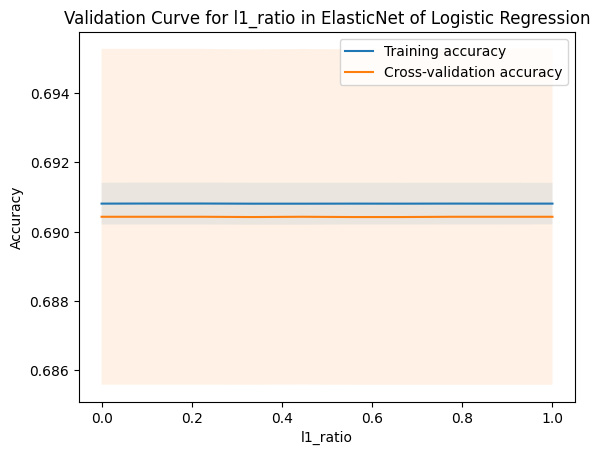

Best l1_ratio: 0.7777777777777777


In [ ]:
# Plot the validation curve
plt.figure()
plt.plot(param_range, train_scores_mean, label='Training accuracy')
plt.plot(param_range, test_scores_mean, label='Cross-validation accuracy')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('l1_ratio')
plt.ylabel('Accuracy')
plt.title('Validation Curve for l1_ratio in ElasticNet of Logistic Regression')
plt.legend()
plt.show()

# Find the best l1_ratio
best_l1_ratio = param_range[np.argmax(test_scores_mean)]
print(f"Best l1_ratio: {best_l1_ratio}")

Parameter C: inverse of regularization strength. Smaller values specify stronger regularization.

In [ ]:
# Looking for best parameter C

# Range of parameter
param_range = np.logspace(-8, 3, 10)

# Apply validation curve with logistic Regression on elastic net parameter
clf = LogisticRegression(penalty='elasticnet', l1_ratio=0.77, solver='saga', random_state=seed, max_iter=10000)
train_scores, test_scores = validation_curve(clf, X=X_train_pca, y=y_train_smote, param_name='C', param_range=param_range, cv=10, n_jobs=1, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

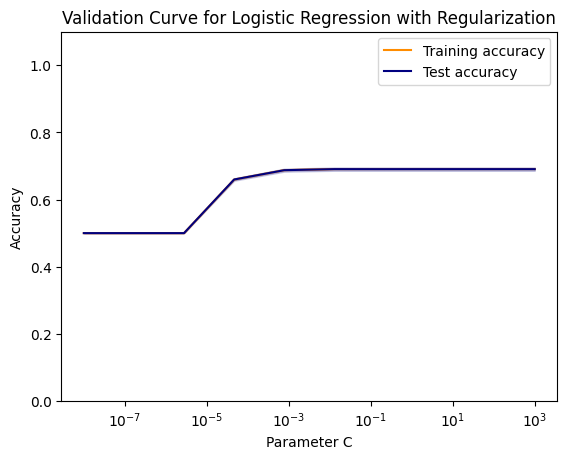

Best parameter C: 0.012915496650148853


In [ ]:
# Plot the validation curve
plt.figure()
plt.title("Validation Curve for Logistic Regression with Regularization")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)

plt.semilogx(param_range, train_scores_mean, label="Training accuracy", color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
plt.semilogx(param_range, test_scores_mean, label="Test accuracy", color="navy")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.show()

# Find the best parameter C
best_C = param_range[np.argmax(test_scores_mean)]
print(f"Best parameter C: {best_C}")

##Regularized Logistic Regression with PCA

In [ ]:
# Initialize model with parameters and fit it on the training set
clf_pca_r = LogisticRegression(penalty='elasticnet', l1_ratio=0.7777, C=0.0129, solver='saga', random_state=seed, max_iter=10000)
clf_pca_r.fit(X_train_pca, y_train_smote)

# Use the model to predict on the test set
y_pred = clf_pca_r.predict(X_test_pca)

# Find the accuracy
acc = clf_pca_r.score(X_test_pca, y_test)

In [ ]:
print(f"Accuracy: {acc}")

Accuracy: 0.646750122997868


##Performance Measures for Regularized Logistic Regression with PCA

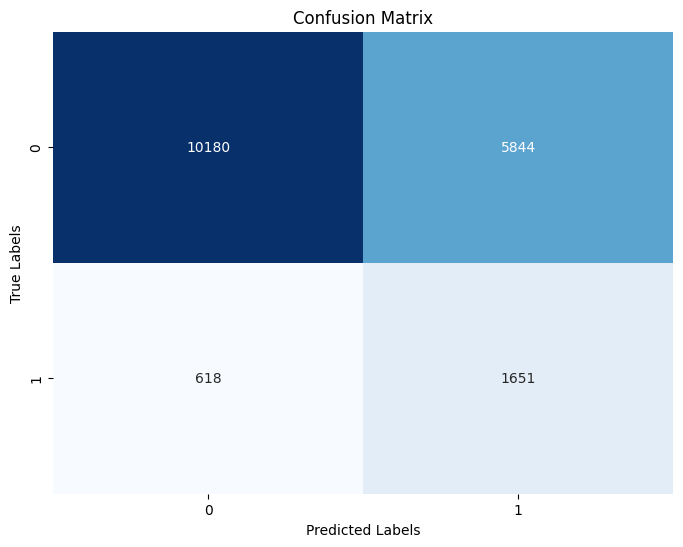

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.94      0.64      0.76     16024
           1       0.22      0.73      0.34      2269

    accuracy                           0.65     18293
   macro avg       0.58      0.68      0.55     18293
weighted avg       0.85      0.65      0.71     18293



Observation: the performance did not improve after applying regularization.

# Conclusion

Although the precision for non-organic product prediction is 0.94, the precision for organic product prediction is only 0.22. Although we applied PCA, SMOTE, and regularization, the performance of the model did not improve. Logistic Regression model as a classifier may not be a good choice for the organic product prediction.